## Ejemplo de compresión de imágenes usando SVD

### Breve introducción teórica

La descomposición en valores singulares (SVD) es una técnica matemática que permite descomponer una matriz en tres componentes: una matriz de vectores singulares izquierdos ($U$), una matriz diagonal de valores singulares ($S$) y una matriz de vectores singulares derechos ($V^T$). Esta descomposición tiene varias aplicaciones, incluyendo la compresión de imágenes. La idea principal es que muchas imágenes pueden ser aproximadas de manera efectiva utilizando solo un subconjunto de los valores singulares y sus correspondientes vectores singulares. Al conservar solo los valores singulares más grandes y sus vectores asociados, podemos reducir significativamente la cantidad de datos necesarios para representar la imagen, lo que resulta en una compresión efectiva.

### Ecuaciones

Dada una imagen representada como una matriz $X$ de tamaño $m \times n$, la descomposición SVD se expresa como:

$$
X = U S V^T
$$

donde:

- $U$ es una matriz $m \times m$ cuyas columnas son los vectores singulares izquierdos.

- $S$ es una matriz diagonal $m \times n$ que contiene los valores singulares en orden descendente.

- $V^T$ es la transpuesta de una matriz $n \times n$ cuyas filas son los vectores singulares derechos.

Para comprimir la imagen, seleccionamos un rango $r$ y aproximamos la matriz original $X$ utilizando solo los primeros $r$ valores singulares y sus vectores asociados:

$$
X_{\text{approx}} = U_r S_r V_r^T
$$

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(1499.5), np.float64(1999.5), np.float64(-0.5))

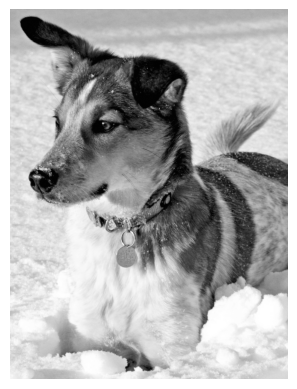

In [9]:
dog = plt.imread(os.path.join("..","data", "dog.jpg"))
X = np.mean(dog, -1)
plt.imshow(X, cmap='gray')
plt.axis('off')

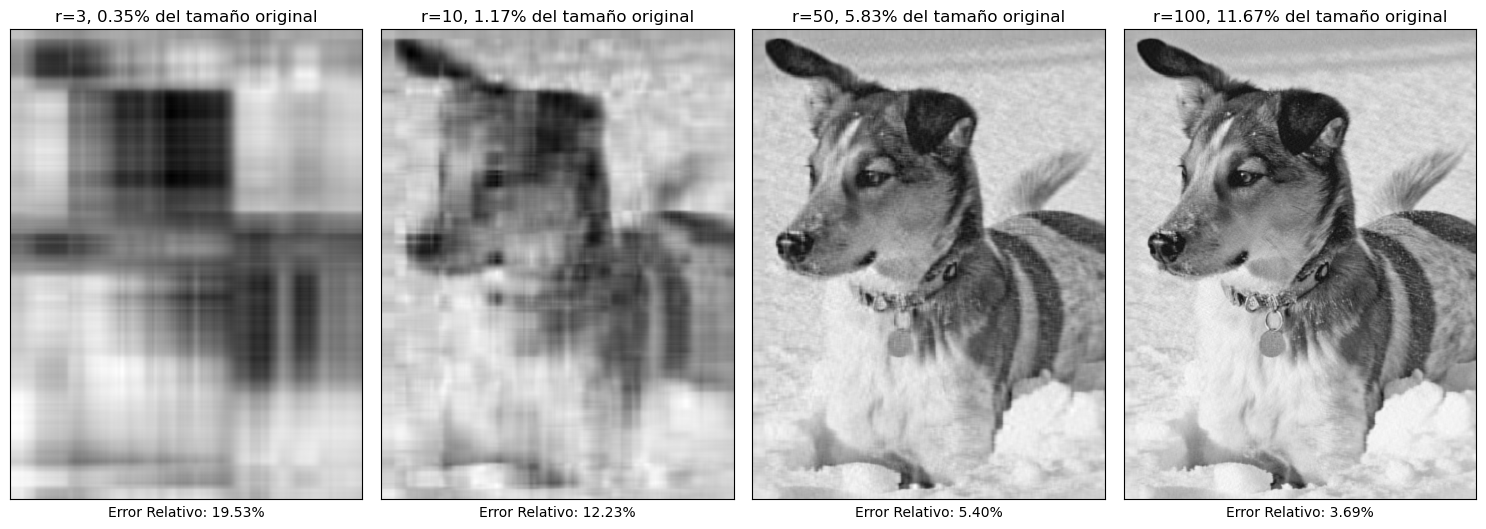

In [16]:
ranks = [3, 10, 50, 100]
fig, axes = plt.subplots(1, len(ranks), figsize=(15, 5))
m,n = X.shape
original = m*n

U, S, Vt = np.linalg.svd(X, full_matrices=False)

for ax, r in zip(axes, ranks):
    Xapprox = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :] # Recomponer la imagen con las primeras r componentes
    
    # Metricas
    comprimido = m*r + r + r*n
    porcentaje = 100 * comprimido / original
    errorRel = np.linalg.norm(X - Xapprox, 'fro')/np.linalg.norm(X,'fro')*100
    
    ax.imshow(Xapprox, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"r={r}, {porcentaje:.2f}% del tamaño original")
    ax.set_xlabel(f"Error Relativo: {errorRel:.2f}%")

plt.tight_layout()
plt.show()


> Nota: quizas sea mas correcto usar el PSNR (Peak Signal to Noise Ratio) en lugar del error relativo para evaluar la calidad de la compresion de imagenes, pero como aun no aprendi exactamente que es voy a obviarlo por ahora.